# **IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk

OOV_TOKEN = "<OOV>"

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/EstiAsmareta/dataset-sentimen-analisis/main/Book1.csv", encoding='latin1')
df.head()

In [ ]:
df = df.rename(columns={'komentar': 'sentences'})
df = df.rename(columns={'labels': 'label'})

In [ ]:
df.head()

In [ ]:
df_lain = pd.read_csv("https://raw.githubusercontent.com/ShinyQ/Analisis-Sentimen-Aplikasi-Dompet-Digital-Indonesia-Menggunakan-Metode-CNN-LSTM/main/data/classifiedV1/dana_cs.csv")
df_lain.head()

In [ ]:
df_lain = df_lain.rename(columns={'predict': 'label'})
df_lain = df_lain.rename(columns={'raw': 'sentences'})

df_lain.head()

In [ ]:
df_lain.count()

In [ ]:
df_lain1 = pd.read_csv("https://raw.githubusercontent.com/wandalistathea/analisis_sentimen_tokopedia/main/Data%20Oke%20Setelah%20Di-Stemming%20(Masing2%203k).csv")
df_lain1.head()

In [ ]:
df_lain1['label'] = df_lain1['sentimen'].replace({0: -1})
print(df_lain1)

In [ ]:
df_lain1 = pd.DataFrame(df_lain1)
df_lain1 = df_lain1.rename(columns={'content':'sentences'})
df_lain1.columns

In [17]:
df_lain2 = pd.read_csv('https://raw.githubusercontent.com/EstiAsmareta/dataset-sentimen-analisis/main/predicted_comments.csv')
df_lain2.head()

,project_ending,rating,text,sentiment
0,Completed,NaN,Terimakasih banyak.,1
1,Self Mediation,NaN,NaN,1
2,Completed,NaN,Selalu keren hasil pekerjaannya.,1
3,Completed,NaN,Selalu puas dengan hasil pekerjaannya...,1
4,Completed,NaN,Mantap! Perkerjaannya cepat dan memuaskan,1


In [18]:
# df_lain2 = df_lain2.rename(columns={'sentimen':'label'})
df_lain2 = df_lain2.rename(columns={'sentiment':'label'})
df_lain2 = df_lain2.rename(columns={'text':'sentences'})
(df_lain2.head())

,project_ending,rating,sentences,label
0,Completed,NaN,Terimakasih banyak.,1
1,Self Mediation,NaN,NaN,1
2,Completed,NaN,Selalu keren hasil pekerjaannya.,1
3,Completed,NaN,Selalu puas dengan hasil pekerjaannya...,1
4,Completed,NaN,Mantap! Perkerjaannya cepat dan memuaskan,1


In [19]:
df_lain2['label'] = df_lain2['label'].replace(2, -1)
df_lain2.dropna(inplace=True)
df_lain2['label'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
df_lain3 = pd.read_csv('https://raw.githubusercontent.com/kaenova/Analisis-Sentimen-Aplikasi-Dompet-Digital-Indonesia-Menggunakan-Metode-CNN-Dan-LSTM/main/data/manualLabelV1/FinalLabel.csv')
df_lain3.head()

,raw,processed,labels
0,Mau ganti nomer akun dana lama no nya hilang s...,ganti nomer akun dana no hilang email whatsapp...,-1
1,Ketauan pake yang lain teman2 pake dana susah ...,ketahuan pakai teman pakai dana susah banget t...,-1
2,"aneh, verifikasi KTP. katanya KTP gua palsu. S...",aneh verifikasi ktp katanya ktp palsu sim pals...,-1
3,Gwe kirim ke req masih proses belum ada konfir...,kirim request proses konfirm masuk pihak dana ...,-1
4,gimana nih pihak ovo udah 1x24 jam saya ngisi ...,pihak ovo jam mengisi pulsa pelanggan masuk ga...,-1


In [21]:
df_lain3 = df_lain3.rename(columns={'raw':'sentences'})
df_lain3 = df_lain3.rename(columns={'labels':'label'})
df_lain3.head()

,sentences,processed,label
0,Mau ganti nomer akun dana lama no nya hilang s...,ganti nomer akun dana no hilang email whatsapp...,-1
1,Ketauan pake yang lain teman2 pake dana susah ...,ketahuan pakai teman pakai dana susah banget t...,-1
2,"aneh, verifikasi KTP. katanya KTP gua palsu. S...",aneh verifikasi ktp katanya ktp palsu sim pals...,-1
3,Gwe kirim ke req masih proses belum ada konfir...,kirim request proses konfirm masuk pihak dana ...,-1
4,gimana nih pihak ovo udah 1x24 jam saya ngisi ...,pihak ovo jam mengisi pulsa pelanggan masuk ga...,-1


In [22]:
print(df_lain3.count())
print(df_lain3['label'].value_counts())

sentences    201
processed    201
label        201
dtype: int64
label
-1    169
 1     32
Name: count, dtype: int64


In [23]:
from sklearn.utils import shuffle

# df_gabung   = pd.concat([df_lain2])
df_gabung   = pd.concat([df, df_lain, df_lain1, df_lain2, df_lain3])
df_gabung =shuffle(df_gabung)
df_gabung = df_gabung.reset_index(drop=True)

In [24]:
df = df_gabung

In [25]:
print(df_gabung.head())
print(df_gabung.count())

                                           sentences  label  \
0  Sebelumnya itu lebih baik dari pada setelah di...     -1   
1  Lebih baik pelayanan tokopedia yg dulu daripad...     -1   
2  Aplikasi apaan ini, kemarin saya rendem giftca...     -1   
3  Ini aplikasi apa sih? Kok saya minta bantuan g...     -1   
4                       Barang-barangnya bagus semua     -1   

                                           processed  score  sentimen  \
0                                                NaN    2.0       0.0   
1                                                NaN    1.0       0.0   
2                                                NaN    1.0       0.0   
3  aplikasi meminta bantuan respon menyelesaikan ...    NaN       NaN   
4                                                NaN    3.0       0.0   

                                       content_clean project_ending  rating  
0                                  update cek ongkir            NaN     NaN  
1  layan tokopedia aju bat

In [26]:
df['label'].value_counts()

label
-1    3830
 1    3199
 0      75
Name: count, dtype: int64

In [27]:
df.dtypes

sentences          object
label               int64
processed          object
score             float64
sentimen          float64
content_clean      object
project_ending     object
rating            float64
dtype: object

# **PRA_PEMROSESAN DATA**

In [28]:
import re
#menghapus RT
df.sentences = df.sentences.str.replace(r'RT', '')
#menghapus \n
df.sentences = df.sentences.str.replace(r'\n', '')
#menghapus link
df.sentences = df.sentences.str.replace(r'https?:\/\/.*[\r\n]*',' ')
#menghapus tanda mata uang dolar dll
df.sentences = df.sentences.str.replace(r'\$\w*',' ')

In [29]:
#lower case semua text
df['sentences'] = df['sentences'].str.lower()

In [30]:
#melihat 5 data paling bawah
df.tail()

,sentences,label,processed,score,sentimen,content_clean,project_ending,rating
7099,apk yg bagus banget sangat² membantu saat kepe...,1,aplikasi bagus banget membantu keperluan menda...,NaN,NaN,NaN,NaN,NaN
7100,bagus sangat membantu😍,1,NaN,5.0,1.0,bagus bantu,NaN,NaN
7101,good,1,NaN,5.0,1.0,good,NaN,NaN
7102,mantappp bener,1,NaN,5.0,1.0,mantap,NaN,NaN
7103,ternyata di sini banyak ulasan nya yg buruk ' ...,-1,NaN,1.0,0.0,ulas buruk untung buka lapak,NaN,NaN


In [31]:
#melihat isi tweet pertama
df.iloc[1]

sentences         lebih baik pelayanan tokopedia yg dulu daripad...
label                                                            -1
processed                                                       NaN
score                                                           1.0
sentimen                                                        0.0
content_clean     layan tokopedia aju batal pesan aju batal toko...
project_ending                                                  NaN
rating                                                          NaN
Name: 1, dtype: object

# **SPLIT THE DATA**

In [32]:
import random  # Menambahkan impor modul random

MAX_EXAMPLE = df['sentences'].count()
sentences_and_labels = list(zip(df['sentences'], df['label']))

random.seed(32)
sentences_and_labels = random.sample(sentences_and_labels, MAX_EXAMPLE)

df['sentences'], df['label'] = zip(*sentences_and_labels)

print(f"There are {len(df['sentences'])} sentences and {len(df['label'])} labels after random sampling\n")

There are 7104 sentences and 7104 labels after random sampling



In [33]:
def train_val_split(sentences, labels, training_split):
  train_size = int(len(sentences) * training_split)

  # Split the sentences and labels into train/validation splits
  train_sentences = sentences[:train_size]
  train_labels = labels[:train_size]

  validation_sentences = sentences[train_size:]
  validation_labels = labels[train_size:]

  return train_sentences, validation_sentences, train_labels, validation_labels

In [34]:
TRAINING_SPLIT = 0.8
train_sentences, val_sentences, train_labels, val_labels = train_val_split(df['sentences'], df['label'], TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 5683 sentences for training.

There are 5683 labels for training.

There are 1421 sentences for validation.

There are 1421 labels for validation.


In [35]:
from tensorflow.keras.utils import to_categorical
encoded_labels = to_categorical(train_labels, num_classes=3)

# **TOKENIZATION - SEQUENCES, TRUNCATE, AND, PADDING**

In [36]:
def fit_tokenizer(train_sentences, oov_token):
  tokenizer = Tokenizer(oov_token=oov_token)
  tokenizer.fit_on_texts(train_sentences)

  return tokenizer

In [37]:
tokenizer = fit_tokenizer(train_sentences, OOV_TOKEN )

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")
print(f"\nindex of word 'aku' should be {word_index['adalah']}")

Vocabulary contains 8654 words

<OOV> token included in vocabulary

index of word 'aku' should be 910


In [38]:
df["sentence_length"] = df["sentences"].apply(len)

In [39]:
print(df["sentence_length"].describe())

count    7104.000000
mean       93.301661
std       110.037357
min         1.000000
25%        15.000000
50%        48.000000
75%       133.000000
max      1014.000000
Name: sentence_length, dtype: float64


In [40]:
EMBEDDING_DIM = 360
MAXLEN = 200
TRUNCATING = 'post'
PADDING = 'post'

In [41]:
def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):
  sequences = tokenizer.texts_to_sequences(sentences)
  pad_trunc_sequences = pad_sequences(sequences, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)

  return pad_trunc_sequences

In [42]:
train_pad_trunc_seq = seq_pad_and_trunc(train_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)
val_pad_trunc_seq = seq_pad_and_trunc(val_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)

print(f"Padded and truncated training sequences have shape: {train_pad_trunc_seq.shape}\n")
print(f"Padded and truncated validation sequences have shape: {val_pad_trunc_seq.shape}")

Padded and truncated training sequences have shape: (5683, 200)

Padded and truncated validation sequences have shape: (1421, 200)


In [43]:
# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=3)
val_labels = to_categorical(val_labels, num_classes=3)

# **DEPLOY MODEL**

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00002)

def create_model(vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE + 1, EMBEDDING_DIM, input_length=MAXLEN),
        tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling1D(pool_size=4),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')  # Ubah jumlah neuron output menjadi 3 (positif, negatif, netral)
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

In [45]:
model = create_model(VOCAB_SIZE,EMBEDDING_DIM,MAXLEN)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 360)          3115800   
                                                                 
 conv1d (Conv1D)             (None, 198, 128)          138368    
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 128)           0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Monitor validation loss for early stopping


In [47]:
history = model.fit(train_pad_trunc_seq, encoded_labels, epochs=20, validation_data=(val_pad_trunc_seq, val_labels), callbacks=[early_stopping])

Epoch 1/20
178/178 [==============================] - 31s 125ms/step - loss: 2.7512 - accuracy: 0.5207 - val_loss: 2.3957 - val_accuracy: 0.5440
Epoch 2/20
178/178 [==============================] - 11s 61ms/step - loss: 2.2944 - accuracy: 0.5436 - val_loss: 2.0865 - val_accuracy: 0.6960
Epoch 3/20
178/178 [==============================] - 7s 41ms/step - loss: 2.0346 - accuracy: 0.5791 - val_loss: 1.8403 - val_accuracy: 0.7122
Epoch 4/20
178/178 [==============================] - 5s 30ms/step - loss: 1.7921 - accuracy: 0.6331 - val_loss: 1.6204 - val_accuracy: 0.7277
Epoch 5/20
178/178 [==============================] - 5s 27ms/step - loss: 1.5972 - accuracy: 0.6715 - val_loss: 1.4498 - val_accuracy: 0.7291
Epoch 6/20
178/178 [==============================] - 3s 16ms/step - loss: 1.4377 - accuracy: 0.7051 - val_loss: 1.3029 - val_accuracy: 0.7495
Epoch 7/20
178/178 [==============================] - 4s 20ms/step - loss: 1.3040 - accuracy: 0.7149 - val_loss: 1.1732 - val_accuracy: 0.7

In [48]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

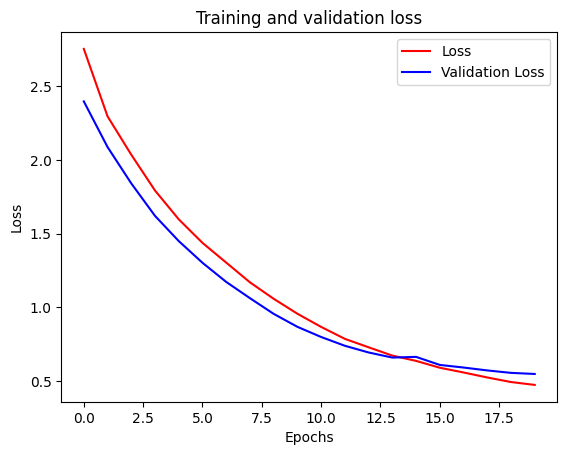

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

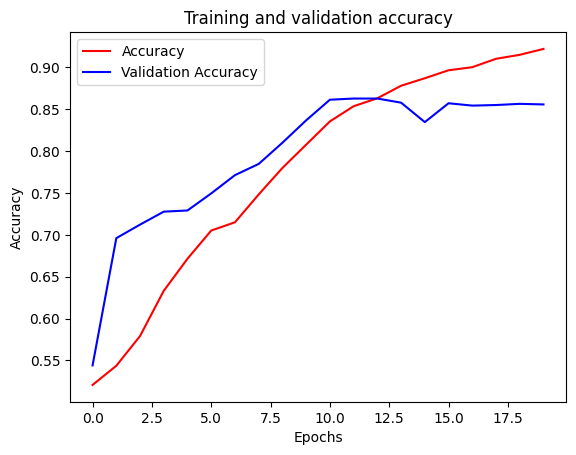

In [50]:
# grader-required-cell

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [51]:
print(f"Training Accuracy: {max(acc):.3f}")
print(f"Validation Accuracy: {max(val_acc):.3f}")

Training Accuracy: 0.922
Validation Accuracy: 0.863


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted labels for your validation data
y_pred = model.predict(val_pad_trunc_seq)  # Replace with your prediction method
y_true = val_labels.argmax(axis=1)  # Assuming your labels are one-hot encoded

# 'micro': Averages across all classes
precision = precision_score(y_true, y_pred.argmax(axis=1), average='micro')
recall = recall_score(y_true, y_pred.argmax(axis=1), average='micro')
f1 = f1_score(y_true, y_pred.argmax(axis=1), average='micro')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

45/45 [==============================] - 1s 4ms/step
Precision: 0.856
Recall: 0.856
F1-score: 0.856


## **PREDICT GENERATOR TEXT**

In [56]:
model.save('my_sentiment_model.keras')

In [ ]:
import pickle

# Save tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully.")

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_sentiment_model.h5')

In [ ]:
def preprocess_sentence(sentence):
  """Fungsi untuk memproses kalimat input.

  Args:
    sentence: Kalimat yang akan diproses.

  Returns:
    Urutan integer yang mewakili kalimat yang dipreproses.
  """
  # Preprocessing steps (tokenization, padding, truncation)
  tokens = tokenizer.texts_to_sequences([sentence])
  pad_trunc_seq = pad_sequences(tokens, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)
  return pad_trunc_seq[0]


In [ ]:
sentence = input("Masukkan kalimat: ")
preprocessed_sentence = preprocess_sentence(sentence)

In [ ]:
prediction = model.predict(np.expand_dims(preprocessed_sentence, axis=0))
predicted_class = prediction.argmax(axis=1)[0]

if predicted_class == 0:
  print("Sentimen: Netral")
elif predicted_class == 1:
  print("Sentimen: Positif")
else:
  print("Sentimen: Negatif")


In [ ]:
df = pd.read_csv('comments.csv')
df.head()

In [ ]:
# Function to preprocess sentence
def preprocess_sentence(sentence):
    """Fungsi untuk memproses kalimat input.

    Args:
        sentence: Kalimat yang akan diproses.

    Returns:
        Urutan integer yang mewakili kalimat yang dipreproses.
    """
    # Preprocessing steps (tokenization, padding, truncation)
    tokens = tokenizer.texts_to_sequences([sentence])
    pad_trunc_seq = pad_sequences(tokens, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)
    return pad_trunc_seq[0]

# Function to predict sentiment
def predict_sentiment(sentences):
    """Fungsi untuk memprediksi sentimen dari beberapa kalimat.

    Args:
        sentences: Daftar kalimat.

    Returns:
        Daftar prediksi sentimen.
    """
    preprocessed_sentences = [preprocess_sentence(sentence) for sentence in sentences]
    predictions = model.predict(np.array(preprocessed_sentences))
    predicted_classes = predictions.argmax(axis=1)
    return predicted_classes

# Load data
data = pd.read_csv('comments.csv')
data['text'] = data['text'].fillna('')
sentences = data['text'].tolist()

# Predict sentiment
predicted_classes = predict_sentiment(sentences)

# Print predictions
for i, predicted_class in enumerate(predicted_classes):
    if predicted_class == 0:
        print(f"Kalimat {i+1}: Sentimen: Netral")
    elif predicted_class == 1:
        print(f"Kalimat {i+1}: Sentimen: Positif")
    elif predicted_class == -1:
        print(f"Kalimat {i+1}: Sentimen: Negatif")

# Print predictions
# for i, predicted_class in enumerate(predicted_classes):
#     if predicted_class == 0:
#         sentiment = "Netral"
#     elif predicted_class == 1:
#         sentiment = "Positif"
#     else:
#         sentiment = "Negatif"
#     print(f"Kalimat {i+1}: Sentimen: {sentiment}")

# Save predictions to CSV
data['sentiment'] = predicted_classes
data.to_excel('predicted_comments.xlsx', index=False)
print("Prediksi sentimen telah disimpan di 'predicted_comments.csv'")

In [ ]:
# Function to predict sentiment (unchanged)
def predict_sentiment(sentences):
  """Fungsi untuk memprediksi sentimen dari beberapa kalimat.

  Args:
      sentences: Daftar kalimat.

  Returns:
      Daftar prediksi sentimen.
  """
  preprocessed_sentences = [preprocess_sentence(sentence) for sentence in sentences]
  predictions = model.predict(np.array(preprocessed_sentences))
  predicted_classes = predictions.argmax(axis=1)
  return predicted_classes

# Load data (unchanged)
data = pd.read_excel('uji.xlsx')
sentences = data['raw'].tolist()

# Predict sentiment (unchanged)
predicted_classes = predict_sentiment(sentences)

# Count sentiment labels
sentiment_counts = pd.Series(predicted_classes).value_counts()

# Calculate percentages
total_sentences = len(predicted_classes)
sentiment_percentages = (sentiment_counts / total_sentences) * 100

# Print sentiment distribution
print("Distribusi Sentimen:")
print(sentiment_percentages.to_string())

max_value = sentiment_percentages.max()
max_label = sentiment_percentages.idxmax()

# Print the sentiment label with the highest percentage
print(f"\nSentimen Tertinggi: {max_label} ({max_value:.2f}%)")
print("\n1:Positif 2:Negatif 0:Netral")
